In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../DATA/lending_club_loan_two.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

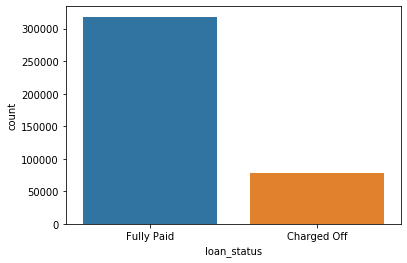

In [4]:
#Lets look at the distribution of target column at first
sns.countplot(x='loan_status',data=df)

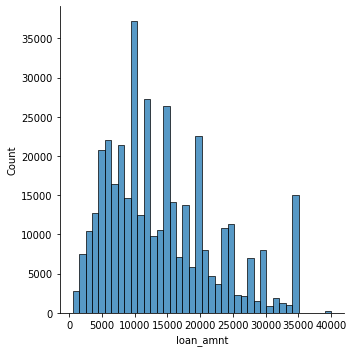

In [5]:
#LEts look at thte distribution of loan amount column through a histogram
sns.displot(df['loan_amnt'],bins=40)

In [6]:
#Lets look at the correlation btw continuous variables
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


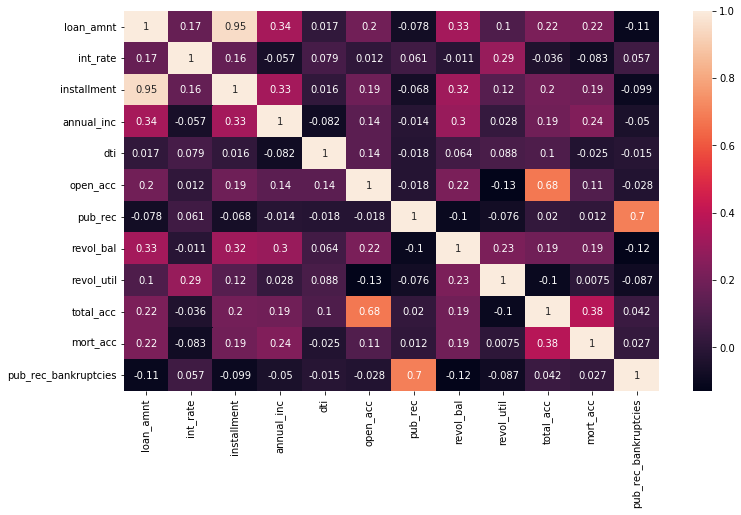

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

We have almost perfect correlation with installment feature. Lets explore this feature further

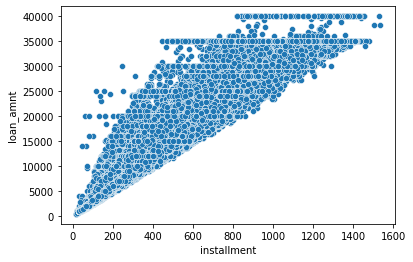

In [8]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

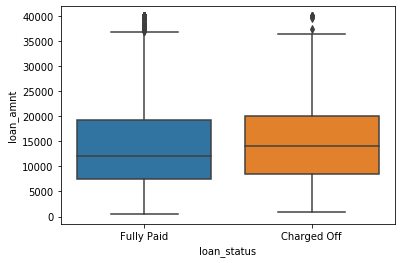

In [9]:
#Boxplot for relationship btw loan amount and loan status
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

From the above plot we could infer that the average loan amount of charged off people is little higher. So higher the loan higher the chances of getting charged off

In [10]:
#summary statistics of loan amount grouped by loan status
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [11]:
#Lets explore the Grade and Subgrade column
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [12]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

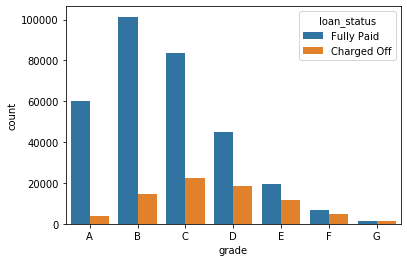

In [13]:
grade_order=sorted(df['grade'].unique())
sns.countplot(x='grade',data=df,hue='loan_status',order = grade_order)

From the above graph we could infer that lower the grade higher the chances of getting charged off

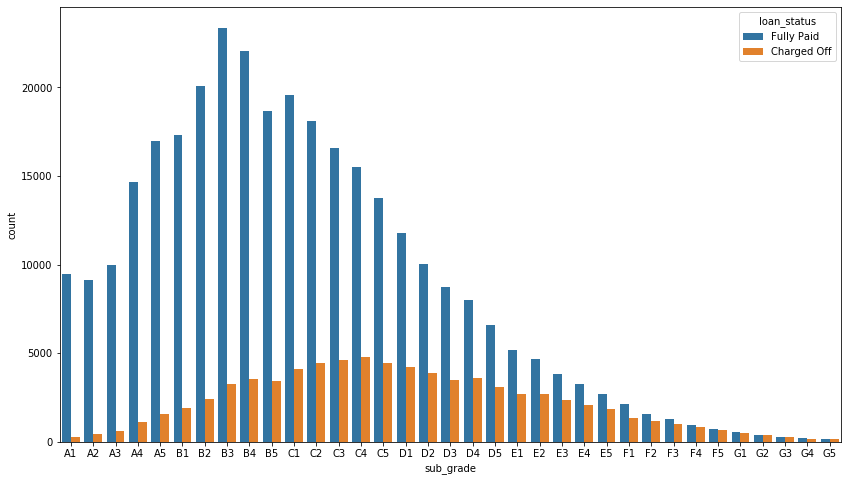

In [14]:
plt.figure(figsize=(14,8))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,hue='loan_status',order =subgrade_order)

People in grade F and G have high probabilities of getting charged off

Creating a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"

In [15]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [16]:
df.corr()['loan_repaid'].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

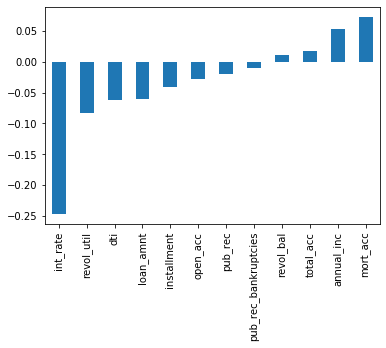

In [17]:
#Correlatoion of numerical features with the target column
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

## Missing Data imputation

In [18]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [19]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [20]:
#lets look at the emp_title column at first
df['emp_title'].nunique()

173105

There are way too many unique values in emp title column to encode them so lets remove this column

In [21]:
df=df.drop('emp_title',axis=1)

In [22]:
#Lets look at the emp_length column
df['emp_length'].dropna().unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [23]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

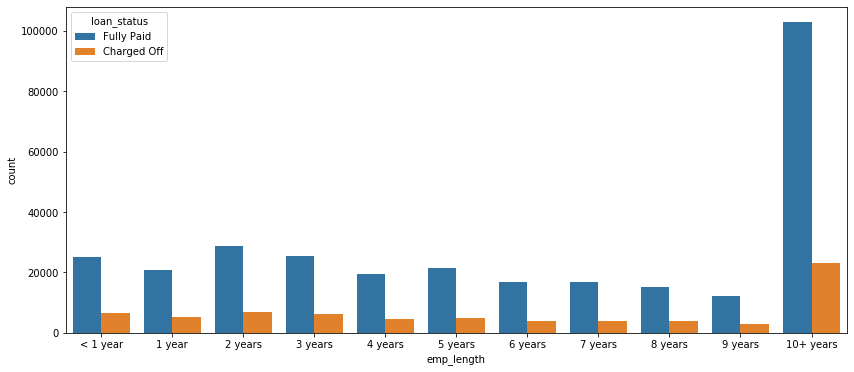

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

The above graph doesn't tell if there is a strong relationship between employment length and being charged off. Lets checkout percentage of charge off per category

In [25]:
emp_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [26]:
emp_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [27]:
emp_len = emp_co/(emp_co+emp_fp)

In [28]:
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

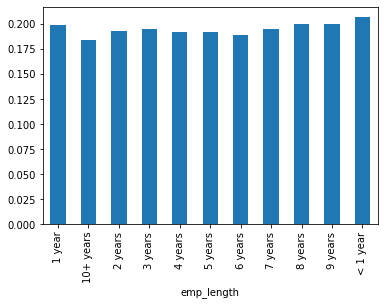

In [29]:
emp_len.plot(kind='bar')

Charge off rates are extremely similar across all employment lengths.So we can drop this column

In [30]:
df = df.drop('emp_length',axis=1)

In [37]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [38]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [33]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [34]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

The title column seems to be a description of purpose column. Lets remove that

In [39]:
df = df.drop('title',axis=1)

In [40]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [43]:
#MOrtacc feature has a lot of missing values..
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [50]:
#total acc has high correlation with mort acc
total_acc_avg=df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [46]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [47]:
df['mort_acc']=df.apply(lambda x:fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)
#We can also use below insted of this function
#df['mort_acc']=df.groupby('total_acc')['mort_acc'].transform(lambda value:value.fillna(value.mean()))

In [48]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [52]:
#revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data.So lets drop them for now
df=df.dropna()

In [53]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [59]:
df.select_dtypes(['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [54]:
  def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}') 

In [55]:
unique_col_values(df)

term: [' 36 months' ' 60 months']
grade: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
sub_grade: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'ANY' 'NONE']
verification_status: ['Not Verified' 'Source Verified' 'Verified']
issue_d: ['Jan-2015' 'Nov-2014' 'Apr-2013' 'Sep-2015' 'Sep-2012' 'Oct-2014'
 'Apr-2012' 'Jun-2013' 'May-2014' 'Dec-2015' 'Apr-2015' 'Oct-2012'
 'Jul-2014' 'Feb-2013' 'Oct-2015' 'Jan-2014' 'Mar-2016' 'Apr-2014'
 'Jun-2011' 'Apr-2010' 'Jun-2014' 'Oct-2013' 'May-2013' 'Feb-2015'
 'Oct-2011' 'Jun-2015' 'Aug-2013' 'Feb-2014' 'Dec-2011' 'Mar-2013'
 'Jun-2016' 'Mar-2014' 'Nov-2013' 'Dec-2014' 'Apr-2016' 'Sep-2013'
 'May-2016' 'Jul-2015' 'Jul-2013' 'Aug-2014' 'May-2008' 'Mar-2010'
 'Dec-2013' 'Mar-2012' 'Mar-2015' 'Sep-2011' 'Jul-2012' 'Dec-2012'
 'Sep-2014' 'Nov-2012' 'Nov-2015' 'Jan-2011' 'May-2012' 'Feb-201

application_type: ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']
address: ['0174 Michelle Gateway\r\nMendozaberg, OK 22690'
 '1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113'
 '87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113' ...
 '953 Matthew Points Suite 414\r\nReedfort, NY 70466'
 '7843 Blake Freeway Apt. 229\r\nNew Michael, FL 29597'
 '787 Michelle Causeway\r\nBriannaton, AR 48052']


In [57]:
df['term']=df['term'].apply(lambda X:int(X[:3]))

In [58]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [61]:
#Grade is a part of subbgrade , So lets remove grade and make dummies of subgrade alone
df=df.drop('grade',axis=1)

In [62]:
subgrade_dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

In [63]:
df=pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [64]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [65]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [66]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [67]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [68]:
dummies=pd.get_dummies(df['home_ownership'],drop_first=True)
df=df.drop('home_ownership',axis=1)
df=pd.concat([df,dummies],axis=1)

In [69]:
#Lets take zip code aone from address column
df['zipcode']=df['address'].apply(lambda x:x[-5:])

In [71]:
dummies = pd.get_dummies(df['zipcode'],drop_first=True)
df = df.drop(['zipcode','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### Data Leakage
we wouldn't know beforehand whether or not a loan would be issued . So lets drop issue_d

In [72]:
df=df.drop('issue_d',axis=1)

In [73]:
#earliest_cr_line seems to be time feature lets just take the year column out of it for our analysis 
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [76]:
df = df.drop('loan_status',axis=1)

In [77]:
#AS we have bulk data and due to memory capacity of system lets take a sample of data for model building
len(df)

395219

In [78]:
df = df.sample(frac=0.2,random_state=101)

In [79]:
len(df)

79044

In [110]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101,stratify=y)

In [112]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
scaler=MinMaxScaler()

In [114]:
X_train = scaler.fit_transform(X_train)

In [115]:
X_test = scaler.transform(X_test)

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [116]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [117]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
248/248 [==============================] - 3s 7ms/step - loss: 0.3900 - val_loss: 0.2788
Epoch 2/25
248/248 [==============================] - 1s 5ms/step - loss: 0.2874 - val_loss: 0.2677
Epoch 3/25
248/248 [==============================] - 1s 5ms/step - loss: 0.2766 - val_loss: 0.2669
Epoch 4/25
248/248 [==============================] - 1s 5ms/step - loss: 0.2720 - val_loss: 0.2641
Epoch 5/25
248/248 [==============================] - 1s 5ms/step - loss: 0.2703 - val_loss: 0.2637
Epoch 6/25
248/248 [==============================] - 1s 6ms/step - loss: 0.2684 - val_loss: 0.2629
Epoch 7/25
248/248 [==============================] - 1s 5ms/step - loss: 0.2658 - val_loss: 0.2646
Epoch 8/25
248/248 [==============================] - 1s 5ms/step - loss: 0.2649 - val_loss: 0.2633
Epoch 9/25
248/248 [==============================] - 1s 6ms/step - loss: 0.2648 - val_loss: 0.2632
Epoch 10/25
248/248 [==============================] - 1s 6ms/step - loss: 0.2636 - val_loss: 0.2625

In [105]:
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
predictions = model.predict(X_test)

In [120]:
predictions

array([[0.9999682 ],
       [0.888775  ],
       [1.        ],
       ...,
       [1.        ],
       [0.93368804],
       [0.7448082 ]], dtype=float32)

In [122]:
predictions[predictions<0.5]

array([3.9659208e-01, 6.4986190e-11, 7.8253015e-10, ..., 2.8428368e-10,
       1.2203426e-10, 2.5408378e-10], dtype=float32)

In [123]:
y_pred = []
for element in predictions:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62      3132
           1       0.88      0.99      0.93     12677

    accuracy                           0.89     15809
   macro avg       0.91      0.73      0.78     15809
weighted avg       0.89      0.89      0.87     15809

